# <font color = 'Purple'> Project 2: Personal Loan Campaign </font>

## <font color = 'Purple'>Client context</font>

<b>AllLife Bank</b> has a good customer base with Primary segment as Liability Customer (Depositors). However very few customers out of these take personal loans. <b><i>Bank want to expand this customer base and covert it's liability customers to personal loan customers, helping bank to earn more interest.</i></b>

<font color = 'Purple'><b>As a data scientist, 
* We have to predict whether a liability customer will go for personal loan
* Which parameters plays important role in making the decision
* Which segment of customer to be target to get most output.</b></font>

<b>Dataset Column Info:</b>

* 'ID': Customer ID
* 'Age': Age of Customer
* 'Experience': Professional experience of Customer in years
* 'Income': Annual Income in Thousand Dollars
* 'ZIPCode': Home Address Zip Code
* 'Family': Number of Family Members
* 'CCAvg': Avg spending on CC per month* 'Education: Education level - 1. Undergraduate, 2: Graduate, 3: Advanced/Professional
* 'Mortgage: Value of House Mortgage if any
* 'Personal_Loan: Did this customer accepted Personal Loan offer in last campaign
* 'Securities_Account: Does this customer have securities account with the bank
* 'CD_Account': Does this customer have certificate of deposit account with the bank
* 'Online': Does this customer use online banking with the bank
* 'CreditCard': Does this customer use CC issued by any other bank

## Import Libraries

In [4]:
# Below Package is to suppress any warnings that we get while executing the packages.
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import ( 
        accuracy_score, 
        confusion_matrix,
        recall_score,
        precision_score,
        f1_score,
)

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import randint

# to enable plots displayed inline within the notebook, rather than in a separate window or output cell
%matplotlib inline

## Data load and Data Observations

In [6]:
data = pd.read_csv('Loan_Modelling.csv')
data_copy = data.copy()
data.shape

(5000, 14)

In [7]:
# View Top 5 records
data.head(5)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [8]:
# View bottom 5 records
data.tail(5)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [9]:
# View unique values in each column
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

<b> Observation </b>

* There are 5000 records and 14 columns in the dataset
* ID columns seems to have all unique values, hence can be dropped.
* Columns like 'Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard' -- They seems categorical variables with low cardinality
* Other columns seems have higher cadinality i.e. more distinct set of values

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [12]:
# Missing value check
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [13]:
# Duplicate record check
data.duplicated().sum()

0

<b>Observation</b>

* There is no missing values in the dataset
* There is no duplicate values to be removed

In [15]:
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

<b>Observation</b>

* Age Ranges from 23 to 67 Years with more than 50% values above 45 years.
* Experience has some negative values which seems incorrect and may need treatment
* ZIPCode may need extra processing
* Categorical Columns like Family, Education, Securities_Account, CD_Account, Online, CreditCard need further analysis
* Columns like Family and Education have all Non-Zero values.

## Univariate Analysis

In [18]:
col_categorical = ['Family', 'Education', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard']

col_remaining = ['Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg',
       'Mortgage', 'Personal_Loan']

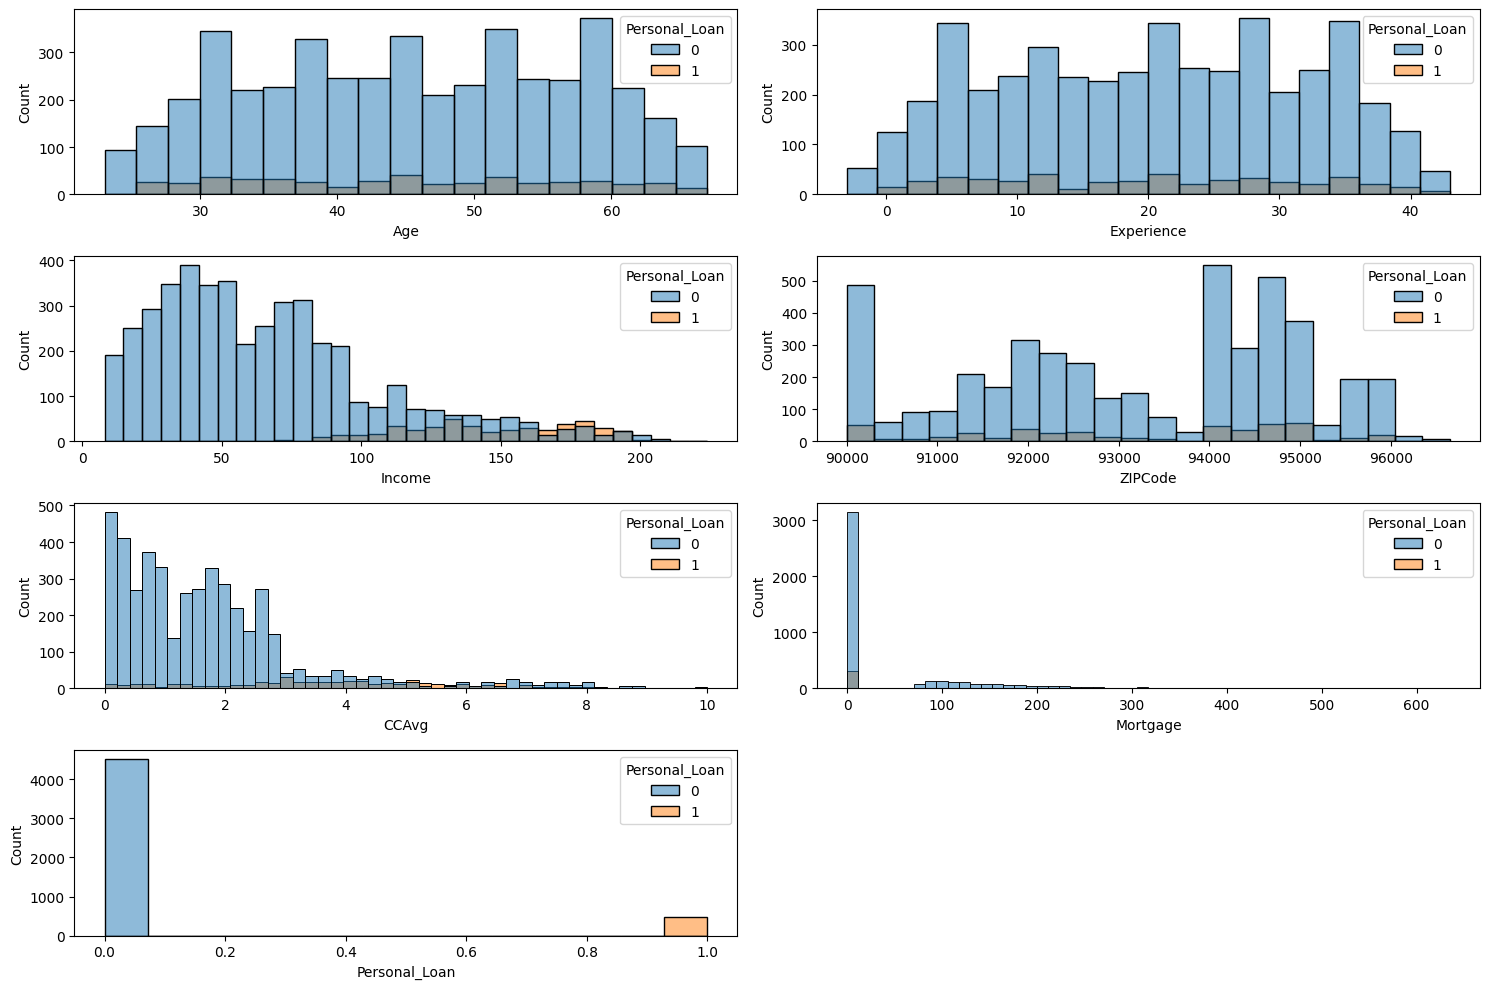

In [19]:
plt.figure(figsize=(15,10))
for i, feature in enumerate(col_remaining):
    plt.subplot(4,2,i+1)
    sns.histplot(data=data[col_remaining], x=feature, hue = 'Personal_Loan')
plt.tight_layout()

<b>Observation</b>

* Income and Average Credit Card spending is Right skewed
* Personal Loan seems evenly distributed for Age and Experience.
* Customers having income more than 80K USD have higher chance to opt for Personal Loan.
* Mortgage seems to be further analyzed

In [21]:
data["Mortgage_Modified"] = [1 if x>0 else 0 for x in data["Mortgage"] ]

In [22]:
data[["Mortgage_Modified","Personal_Loan"]].groupby("Mortgage_Modified").sum()

Personal_Loan
Mortgage_Modified               
0                            312
1                            168

<Axes: xlabel='Mortgage_Modified', ylabel='Count'>

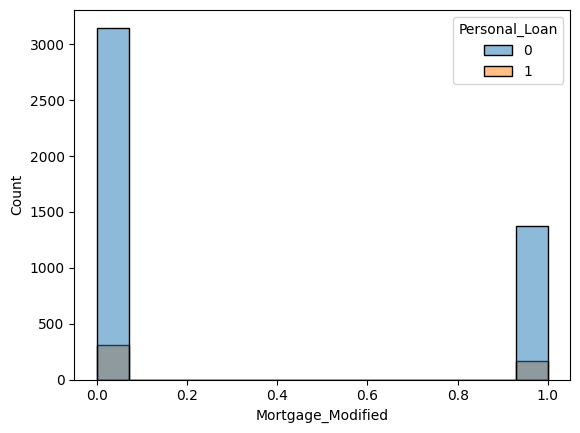

In [23]:
sns.histplot(data, x='Mortgage_Modified', hue = 'Personal_Loan')

<b>Observation</b>

* People with no Mortgage have higher chance to opt for Personal Loan 

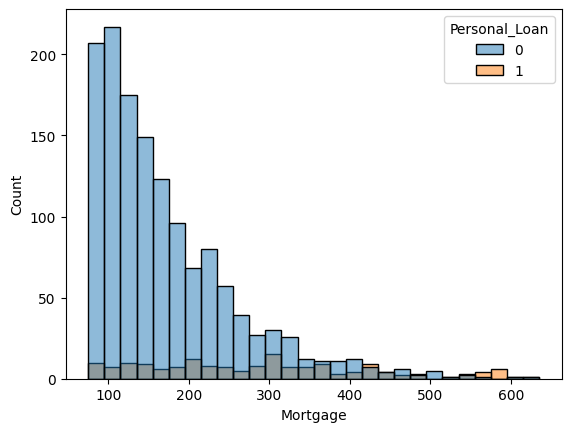

In [25]:
sns.histplot(data = data[data["Mortgage_Modified"]==1], x="Mortgage", hue="Personal_Loan")
plt.show()

<b> Observation </b>

* Although the records where Mortgage is taken, the plot suggests there is Right skewness, but there seems no pattern in the personal loan opted.

In [27]:
## Zip Code processing

data["Zip_Mod"] = data["ZIPCode"].apply(lambda x: str(x)[0:2])
print("Unique Processed Zip Codes", data["Zip_Mod"].nunique())

data[["Zip_Mod", "Personal_Loan"]].groupby("Zip_Mod").sum()

Unique Processed Zip Codes 7


Personal_Loan
Zip_Mod               
90                  67
91                  55
92                  94
93                  43
94                 138
95                  80
96                   3

<b> Observation </b>

* 467 Unique Zip Codes reduced to 7 Area Codes.
* Code 94 corresponding to 'California' seems to have highest Personal Loans
* Code 96 corresponding to 'Hawaii' seems to have lowest Personal Loans

        Personal_Loan
Family               
1                 107
2                 106
3                 133
4                 134
--------------------------
           Personal_Loan
Education               
1                     93
2                    182
3                    205
--------------------------
                    Personal_Loan
Securities_Account               
0                             420
1                              60
--------------------------
            Personal_Loan
CD_Account               
0                     340
1                     140
--------------------------
        Personal_Loan
Online               
0                 189
1                 291
--------------------------
            Personal_Loan
CreditCard               
0                     337
1                     143
--------------------------


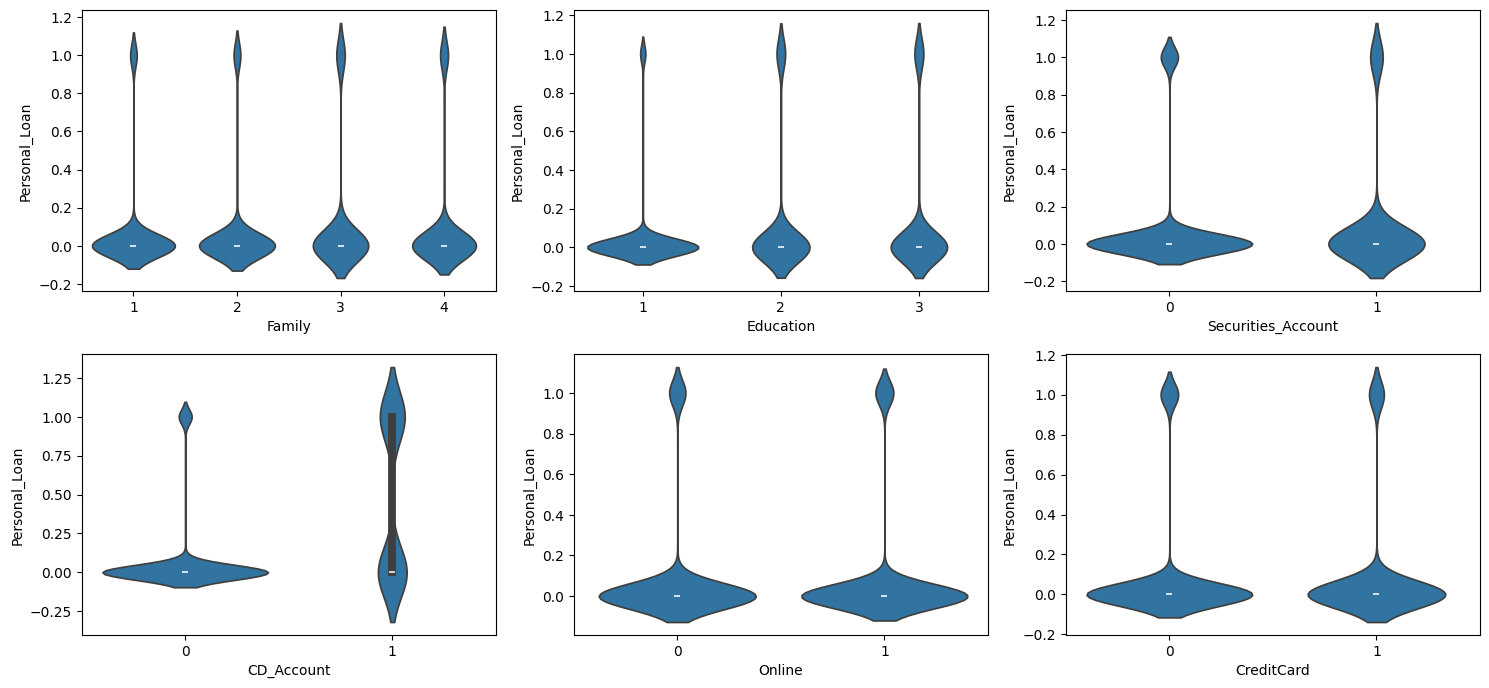

In [29]:
# Check for the distribution of Personal Loans across other categorical columns 
col_categorical1 = ['Family', 'Education', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard']
plt.figure(figsize=(15,10))
for i, feature in enumerate(col_categorical1):
    plt.subplot(3,3,i+1)
    print(data[[feature, "Personal_Loan"]].groupby(feature).sum())
    sns.violinplot(x=feature, y="Personal_Loan", data=data)
    print("--------------------------")
plt.tight_layout()
    

<b> Observation </b>

* Higher the Education, higher is the chance to opt for Personal Loan
* People with no Securities Account have higher chance to opt for Personal Loan
* People with no CD (Certificate of Deposit) Account have higher chance to opt for Personal Loan
* People using Online facility have higher chance to opt for Personal Loan
* People not using CreditCard have higher chance to opt for Personal Loan

## Biraviate Analysis

['ID', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Mortgage_Modified', 'Zip_Mod']


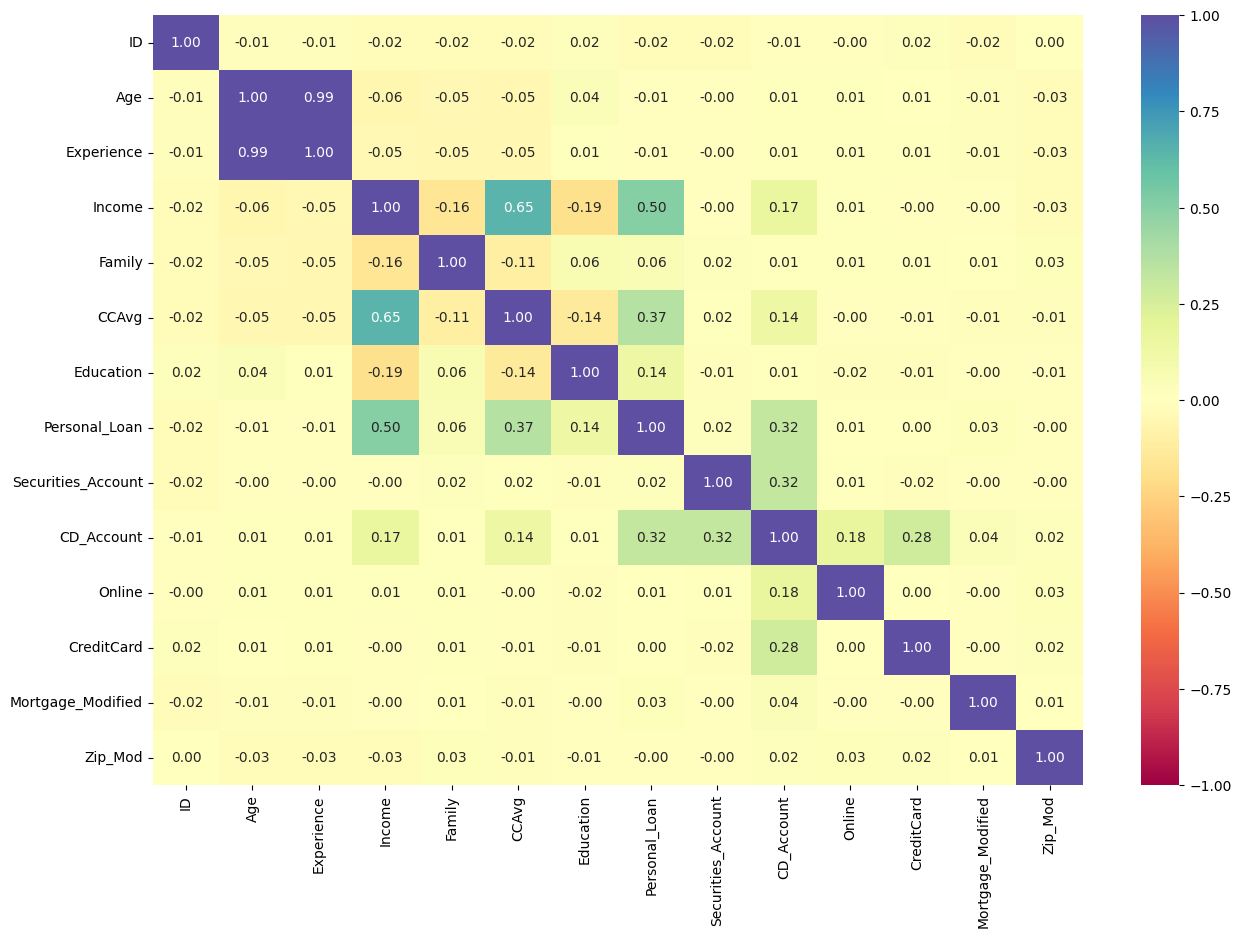

In [32]:
cols_list = data.columns.tolist()
cols_list.remove("ZIPCode")
cols_list.remove("Mortgage")
print(cols_list)

plt.figure(figsize=(15, 10))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f" , cmap="Spectral"
)
plt.show()

<b>Observation</b>

* Age and Experience have very high Correlation, hence one of these columns can be dropped while creating model.
* Personal_Loan seems to have some positive correlation with - Income, CCAvg, CD_Account and Education
* CD_Account seems to have some positive correlation with - Securities_Account, CreditCard, Income and CCAvg

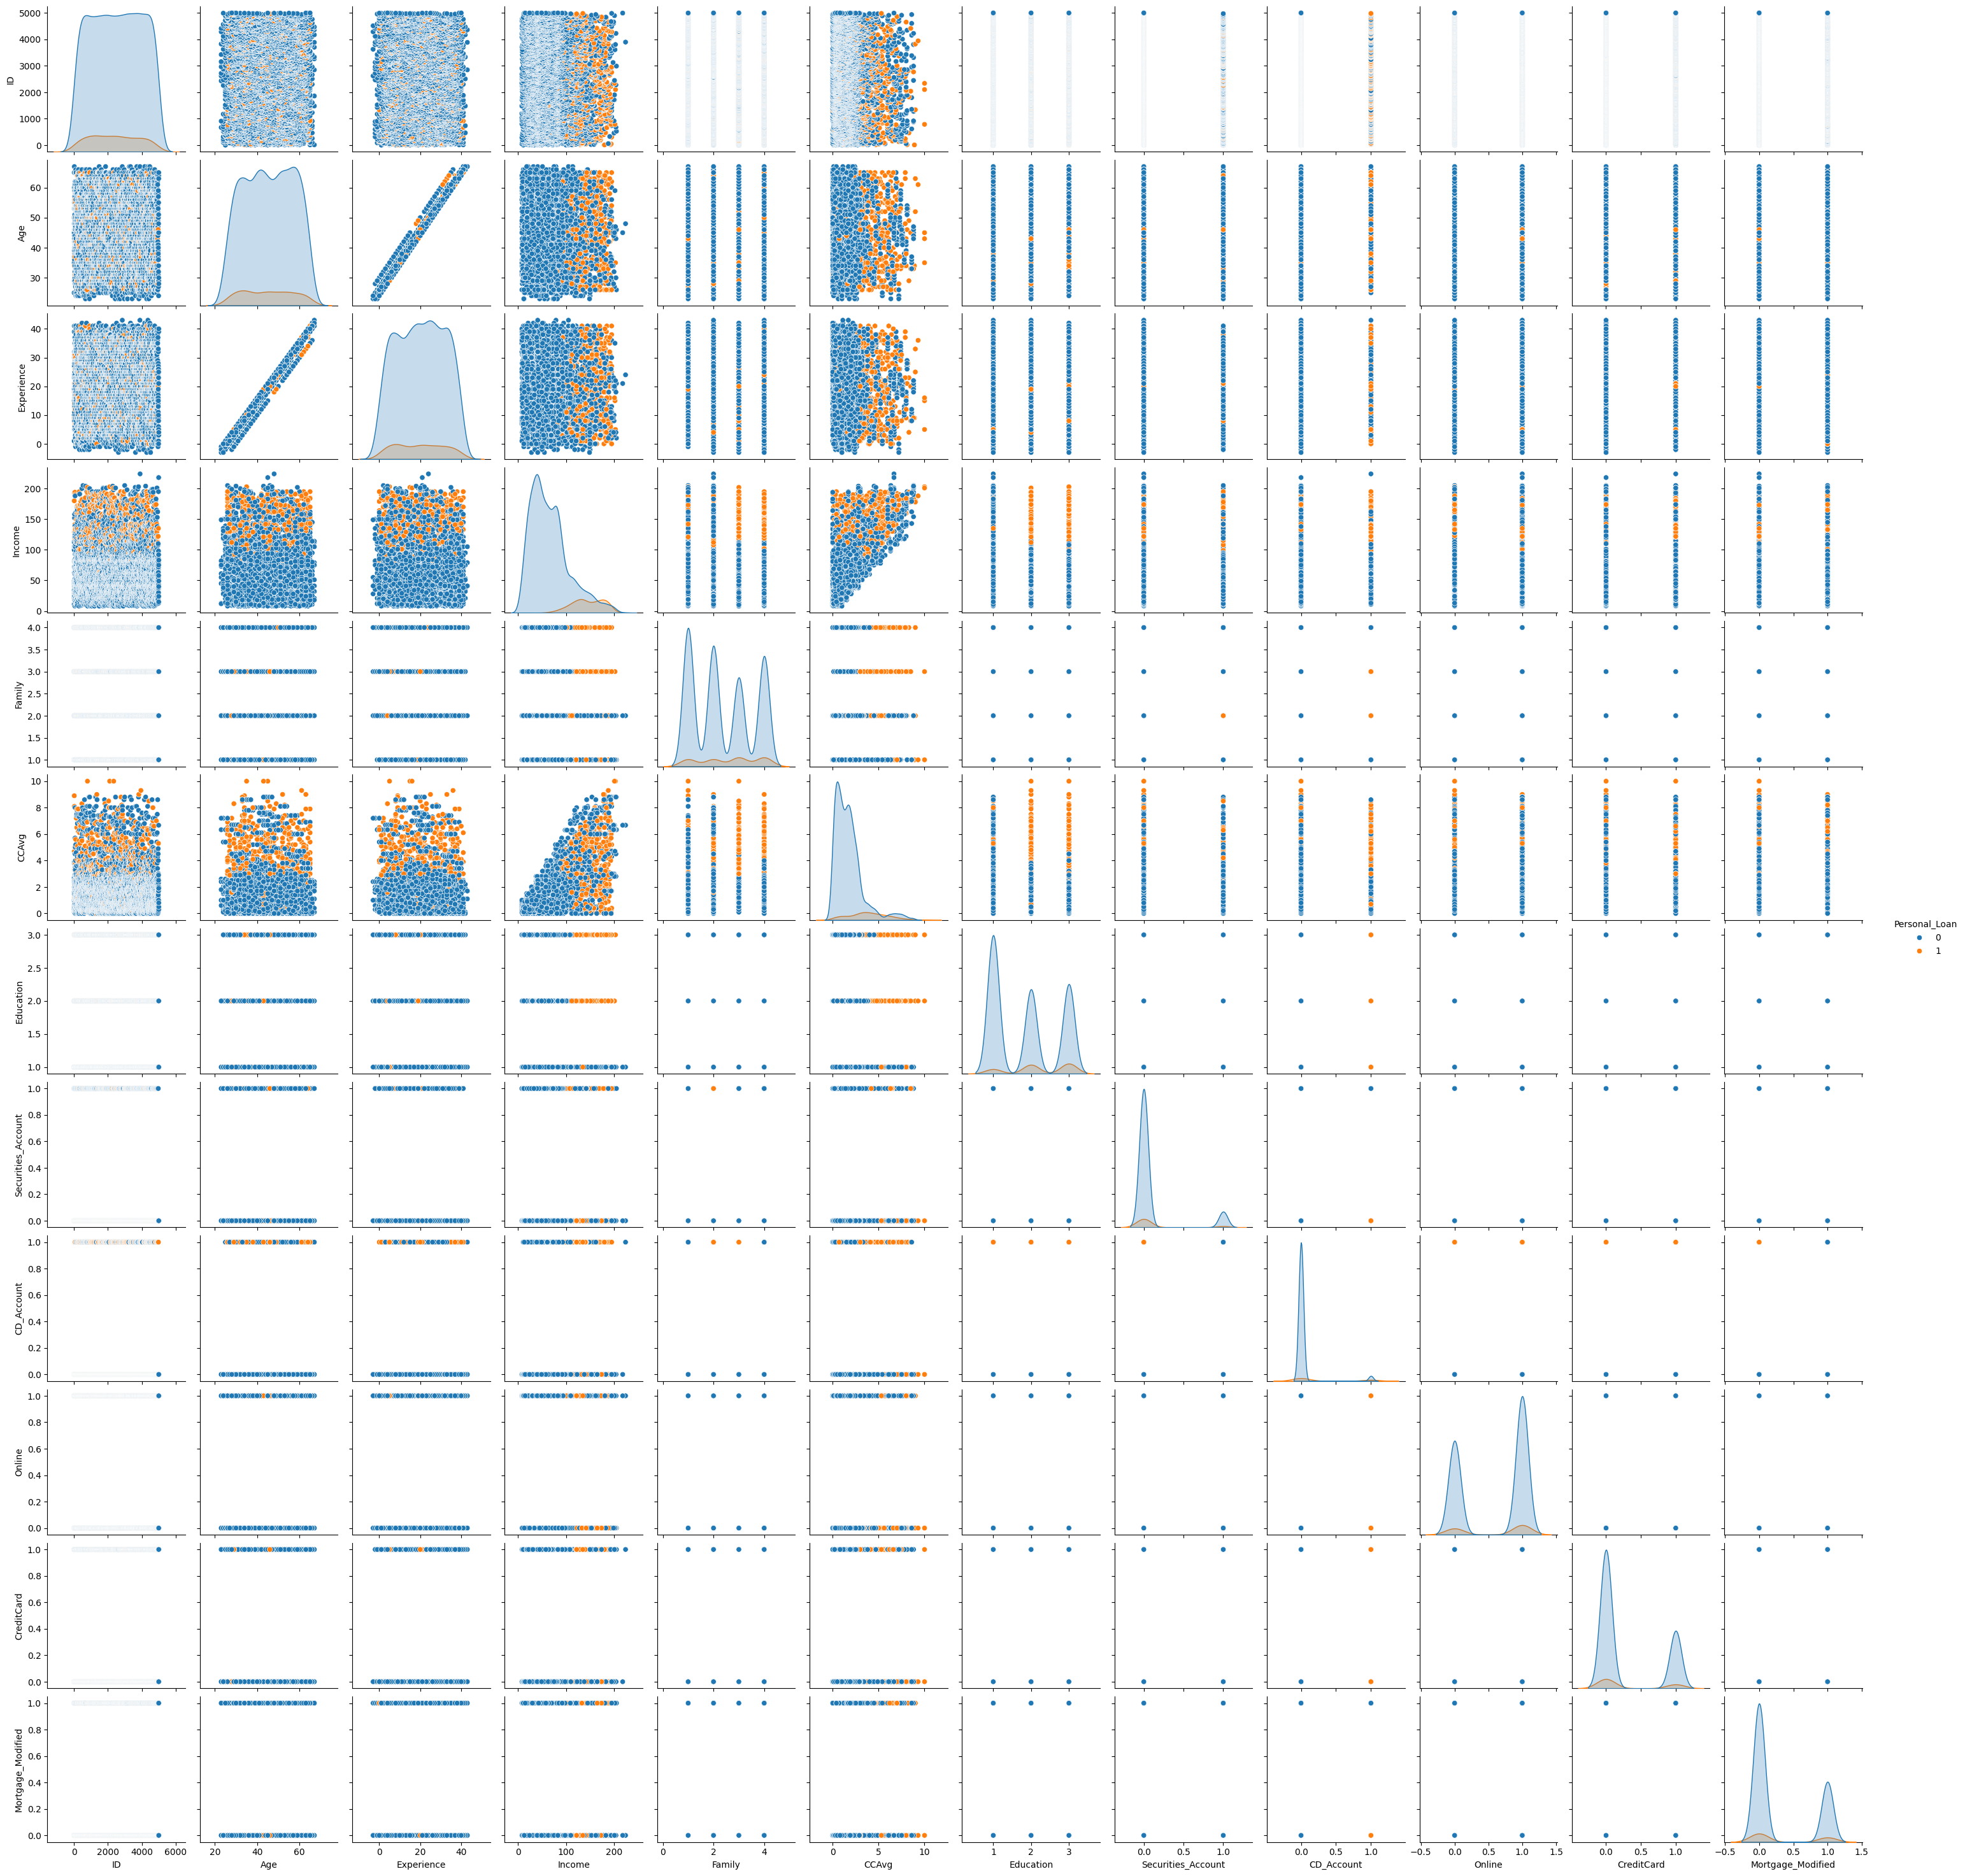

In [34]:
 sns.pairplot(data[cols_list], hue = 'Personal_Loan')
 plt.show()

## Data Pre-Processing

In [36]:
# Drop ID column
data.drop(["ID"], axis=1, inplace=True)

In [39]:
# Drop ZipCode and Mortgage_Modified columns as they seems to have no value add in the model
data.drop(["ZIPCode", "Mortgage_Modified","Zip_Mod"], axis=1, inplace=True)

In [40]:
# Replace Negative values in Experience with 0 
data[data.Experience<0]
data.loc[data.Experience<0, 'Experience'] = 0

data.reset_index()

index  Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0         0   25           1      49       4    1.6          1         0   
1         1   45          19      34       3    1.5          1         0   
2         2   39          15      11       1    1.0          1         0   
3         3   35           9     100       1    2.7          2         0   
4         4   35           8      45       4    1.0          2         0   
...     ...  ...         ...     ...     ...    ...        ...       ...   
4995   4995   29           3      40       1    1.9          3         0   
4996   4996   30           4      15       4    0.4          1        85   
4997   4997   63          39      24       2    0.3          3         0   
4998   4998   65          40      49       3    0.5          2         0   
4999   4999   28           4      83       3    0.8          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 13 columns]

In [41]:
# Split Train and Test Data

X = data.drop(["Personal_Loan"], axis=1) # ,"ZIPCode","Mortgage","Experience"
Y = data["Personal_Loan"]

X = pd.get_dummies(X, drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [42]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("\n Percentage of classes in Training set:")
print(y_train.value_counts(normalize=True))
print("\n Percentage of classes in Test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 11)
Shape of test set :  (1500, 11)

 Percentage of classes in Training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64

 Percentage of classes in Test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


<b>Observation</b>

* The percentages of classes in Train and Test Dataset suggests similar distribution of values.
* Target value is heavily imbalanced

## Model Building

<b> Model can make wrong predictions as: </b>

* Predicting a customer will not take loan, but in reality customer does (FN) = This is Loss of Business for the bank
* Predicting a customer will take loan, but in reality customer does not (FP) = This is loss of marketing expenditure
  
<b> Which case is more important? </b>

* Loss of business is greater loss as this is directly impacting revenue.

<b> How to reduce the losses? </b>

* The bank would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

In [46]:
# Common funciton to calculate diff mertics after every model

def metrics_scores(model, predictor, target):
    # predicting using the independent variables
    pred = model.predict(predictor)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    score = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return score


In [47]:
# Common funciton to calculate diff confusion mertics after every model

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [48]:
model0 = model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0




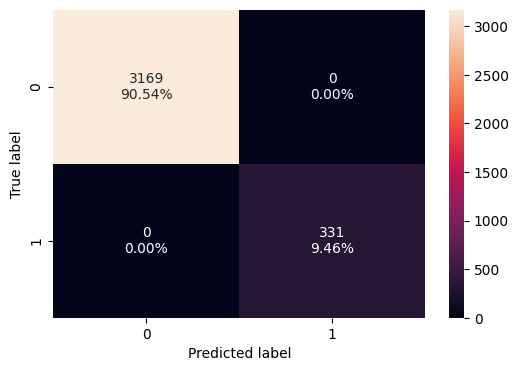

In [49]:
## Train Variable
decision_tree_default_perf_train = metrics_scores(model0, X_train, y_train)
print(decision_tree_default_perf_train)
print("\n")
confusion_matrix_sklearn(model0, X_train, y_train)

   Accuracy    Recall  Precision        F1
0      0.98  0.885906   0.910345  0.897959




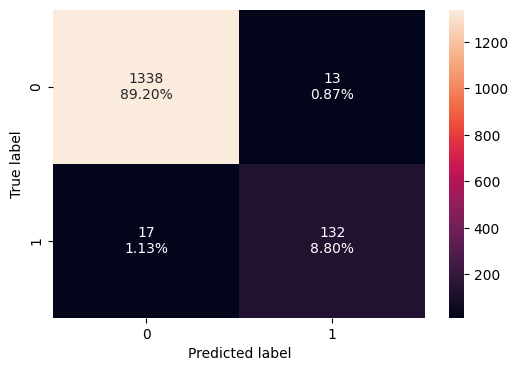

In [50]:
## Test Variable
decision_tree_default_perf_test = metrics_scores(model0, X_test, y_test)
print(decision_tree_default_perf_test)
print("\n")
confusion_matrix_sklearn(model0, X_test, y_test)

<b>Observation</b>

The difference in Recall suggest that the model is overfitted on train test and has not generalized well on test data

## Decision Tree (with class_weights)

Adjust the class_weight hyperparameter to be "balanced" since the target variable is highly imbalanced.

In [53]:
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0




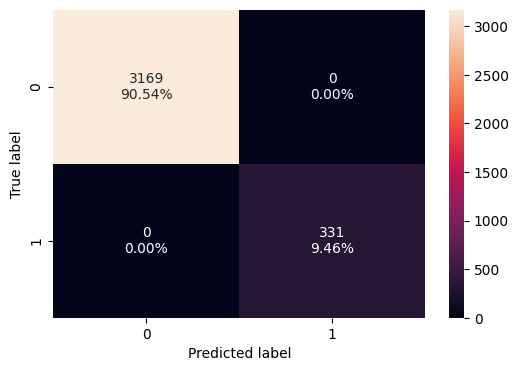

In [54]:
decision_tree_perf_train = metrics_scores(model1, X_train, y_train)
print(decision_tree_perf_train)
print("\n")

confusion_matrix_sklearn(model1, X_train, y_train)

   Accuracy   Recall  Precision        F1
0  0.974667  0.85906   0.882759  0.870748




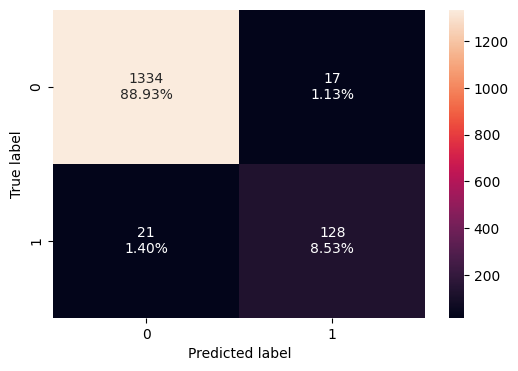

In [55]:
decision_tree_perf_test = metrics_scores(model1, X_test, y_test)
print(decision_tree_perf_test)
print("\n")

confusion_matrix_sklearn(model1, X_test, y_test)

<b>Observation</b>

The difference in Recall suggest that the model is overfitted on train test and has not generalized well on test data

Next we need to try pre-pruning and post-pruning approaches to further tune the model

## Decision Trees: Pre-Pruning with Randomized Search Technique

In [58]:
# Define the parameter distribution to sample from
param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    "criterion": ["gini", "entropy"],
}

dtree = DecisionTreeClassifier(random_state=42)

## RandomizedSearchCV works by sampling random combinations of hyperparameters from the search space and evaluating them using cross-validation.
## In contrast to GridSearchCV, in RandomizedSearchCV not all parameter values are tried out, but rather a fixed number of parameter settings is sampled 
## from the specified distributions. The number of parameter settings that are tried is given by n_iter.

random_search = RandomizedSearchCV(dtree, param_distributions=param_dist, 
                                   n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print(f"Best Parameters (Random Search): {best_params_random}")
print(f"Best Score (Random Search): {best_score_random}")

Best Parameters (Random Search): {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 7}
Best Score (Random Search): 0.9879999999999999


In [59]:
model2 = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=4, min_samples_leaf=2, min_samples_split=7)
model2.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       min_samples_split=7, random_state=42)

   Accuracy    Recall  Precision        F1
0  0.988571  0.909366   0.967846  0.937695




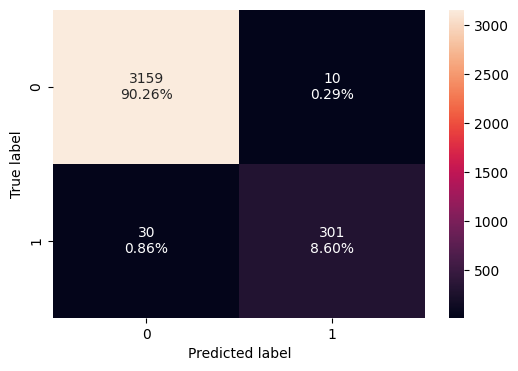

In [60]:
## Train Variable
decision_tree_tune_perf_train = metrics_scores(model2, X_train, y_train)
print(decision_tree_tune_perf_train)
print("\n")
confusion_matrix_sklearn(model2, X_train, y_train)

   Accuracy    Recall  Precision        F1
0  0.978667  0.825503   0.953488  0.884892




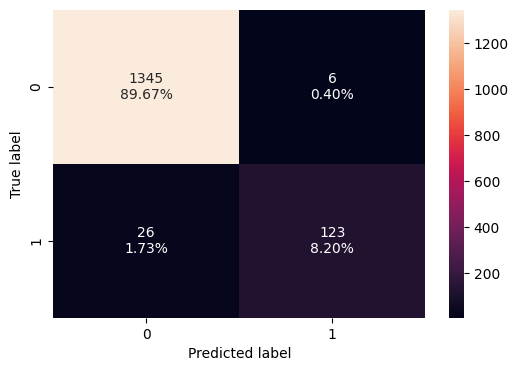

In [61]:
## Test Variable
decision_tree_tune_perf_test = metrics_scores(model2, X_test, y_test)
print(decision_tree_tune_perf_test)
print("\n")
confusion_matrix_sklearn(model2, X_test, y_test)

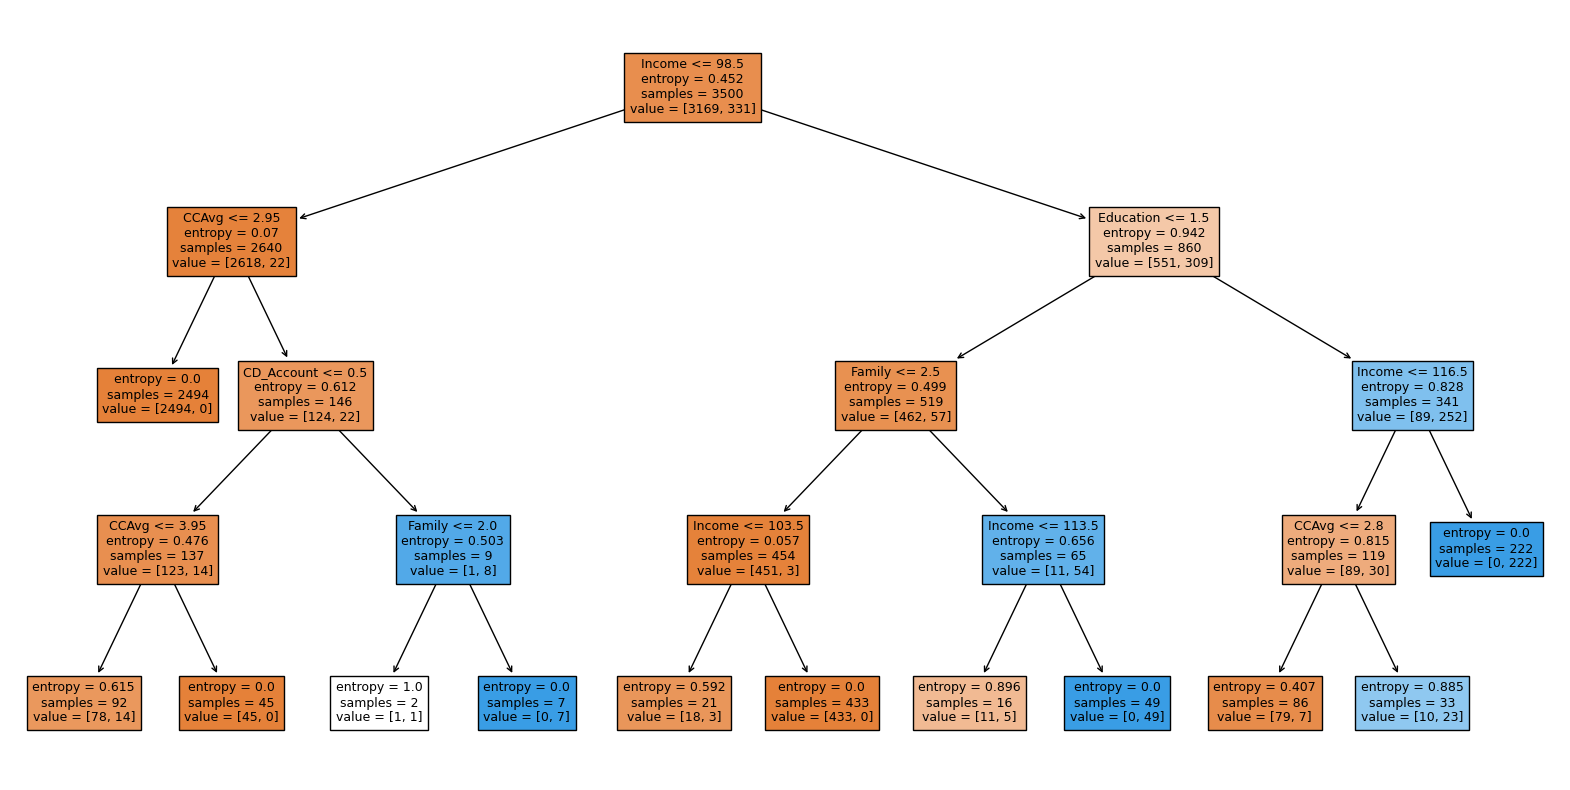

In [62]:
feature_names = list(X_train.columns)
importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [63]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2494.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [78.00, 14.00] class: 0
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [45.00, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- Family <= 2.00
|   |   |   |   |--- weights: [1.00, 1.00] class: 0
|   |   |   |--- Family >  2.00
|   |   |   |   |--- weights: [0.00, 7.00] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 103.50
|   |   |   |   |--- weights: [18.00, 3.00] class: 0
|   |   |   |--- Income >  103.50
|   |   |   |   |--- weights: [433.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 113.50
|   |   |   |   |--- weights: [11.00, 5.00] class: 0
|   |   |   |--- Income >  113.50
|   |   |   |   |--- weights: [0.00, 49.00] class: 1
|   |--- Education >  1.50
|   |

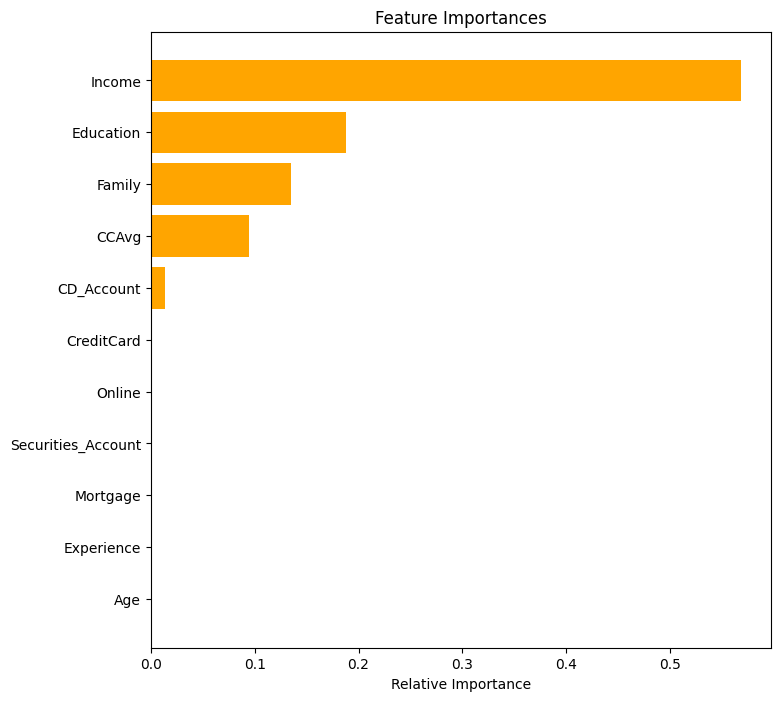

In [64]:
# importance of features in the tree building

importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="orange", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Decision Tree: Post-Pruning

In [66]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [67]:
pd.DataFrame(path).head(5)

ccp_alphas  impurities
0    0.000000    0.000000
1    0.000223    0.001114
2    0.000268    0.002188
3    0.000359    0.003263
4    0.000381    0.003644

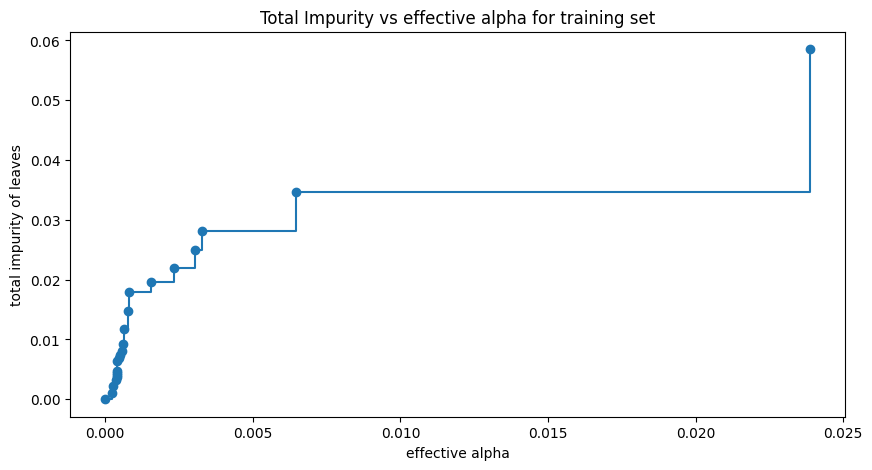

In [68]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [69]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [70]:
print("Number of nodes in the last tree is: {} with ccp_alpha: {} and a depth of: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1],clfs[-1].tree_.max_depth))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575 and a depth of: 0


In [71]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

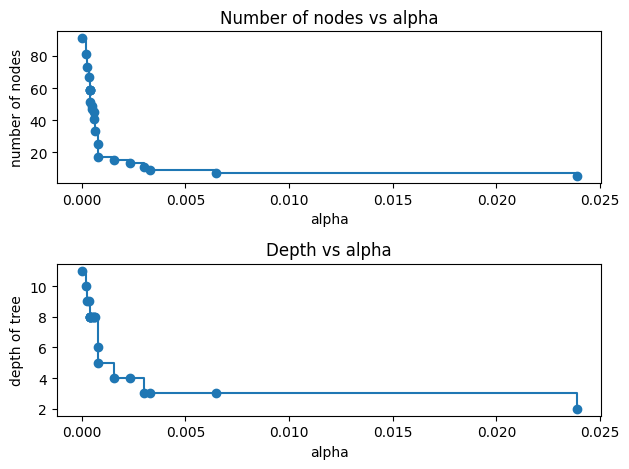

In [72]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [73]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [74]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

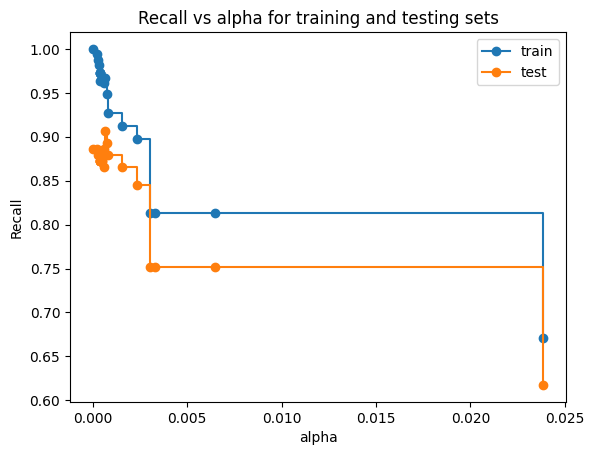

In [75]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [76]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)


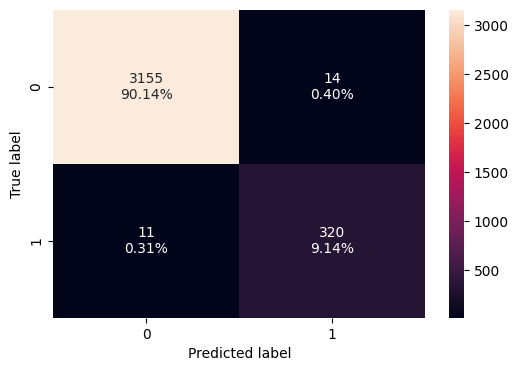

In [77]:
model3 = best_model
confusion_matrix_sklearn(model3, X_train, y_train)

In [78]:
decision_tree_post_perf_train = metrics_scores(
    model3, X_train, y_train
)
decision_tree_post_perf_train

Accuracy    Recall  Precision        F1
0  0.992857  0.966767   0.958084  0.962406

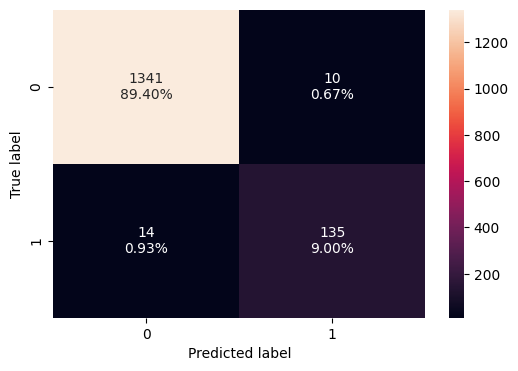

In [79]:
confusion_matrix_sklearn(model3, X_test, y_test)

In [80]:
decision_tree_post_test = metrics_scores(
    model3, X_test, y_test
)
decision_tree_post_test

Accuracy   Recall  Precision        F1
0     0.984  0.90604   0.931034  0.918367

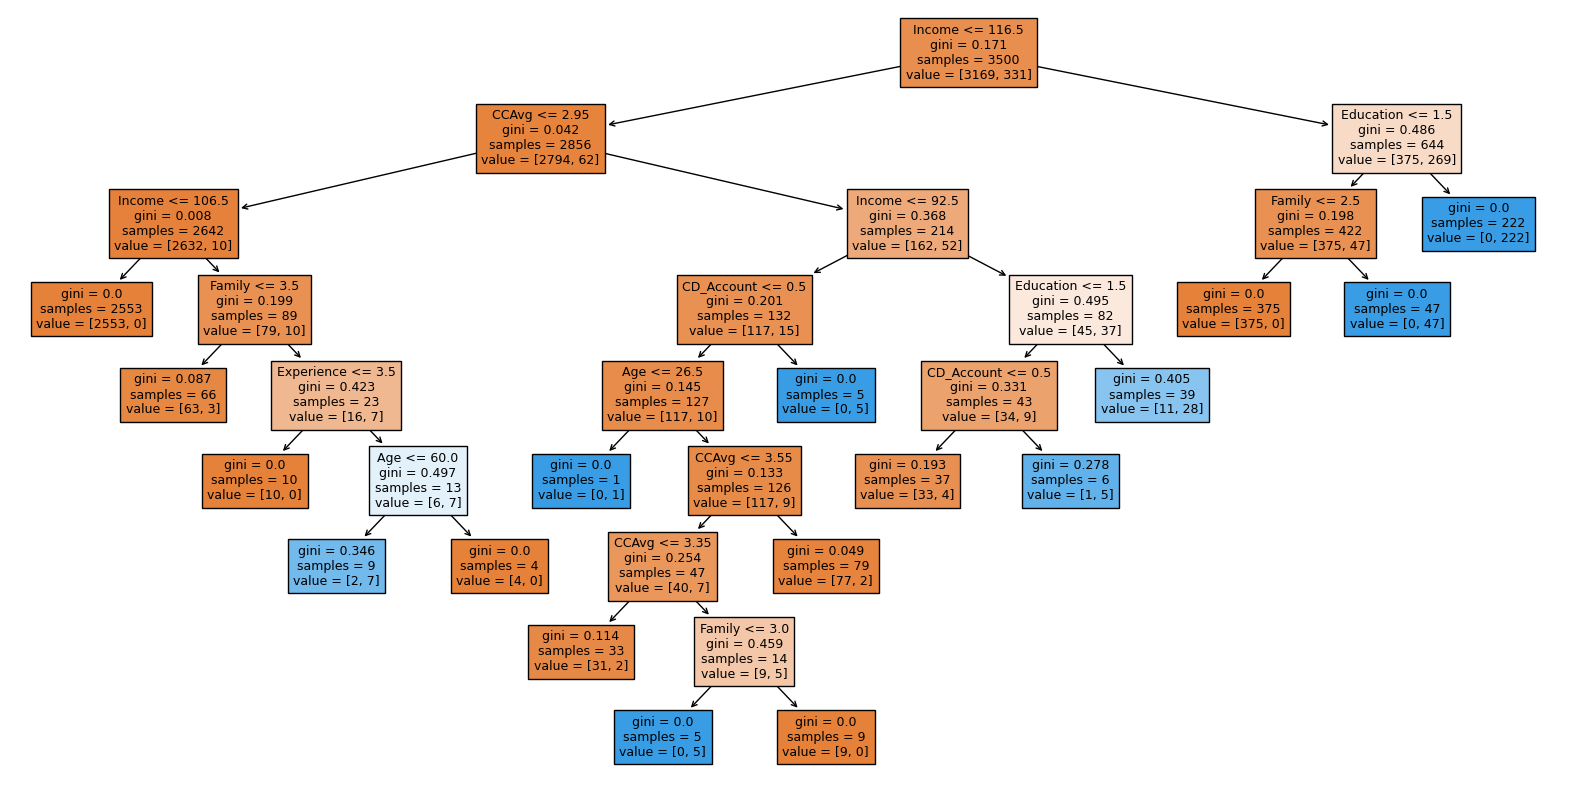

In [81]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [82]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model3, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |   |   |--- Experience >  3.50
|   |   |   |   |   |--- Age <= 60.00
|   |   |   |   |   |   |--- weights: [2.00, 7.00] class: 1
|   |   |   |   |   |--- Age >  60.00
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |   |--- weights: [31.00, 2.00] class: 0
|   |   |   |   |   |   |--- CCAvg 

In [83]:
importances = model3.feature_importances_
indices = np.argsort(importances
                    )

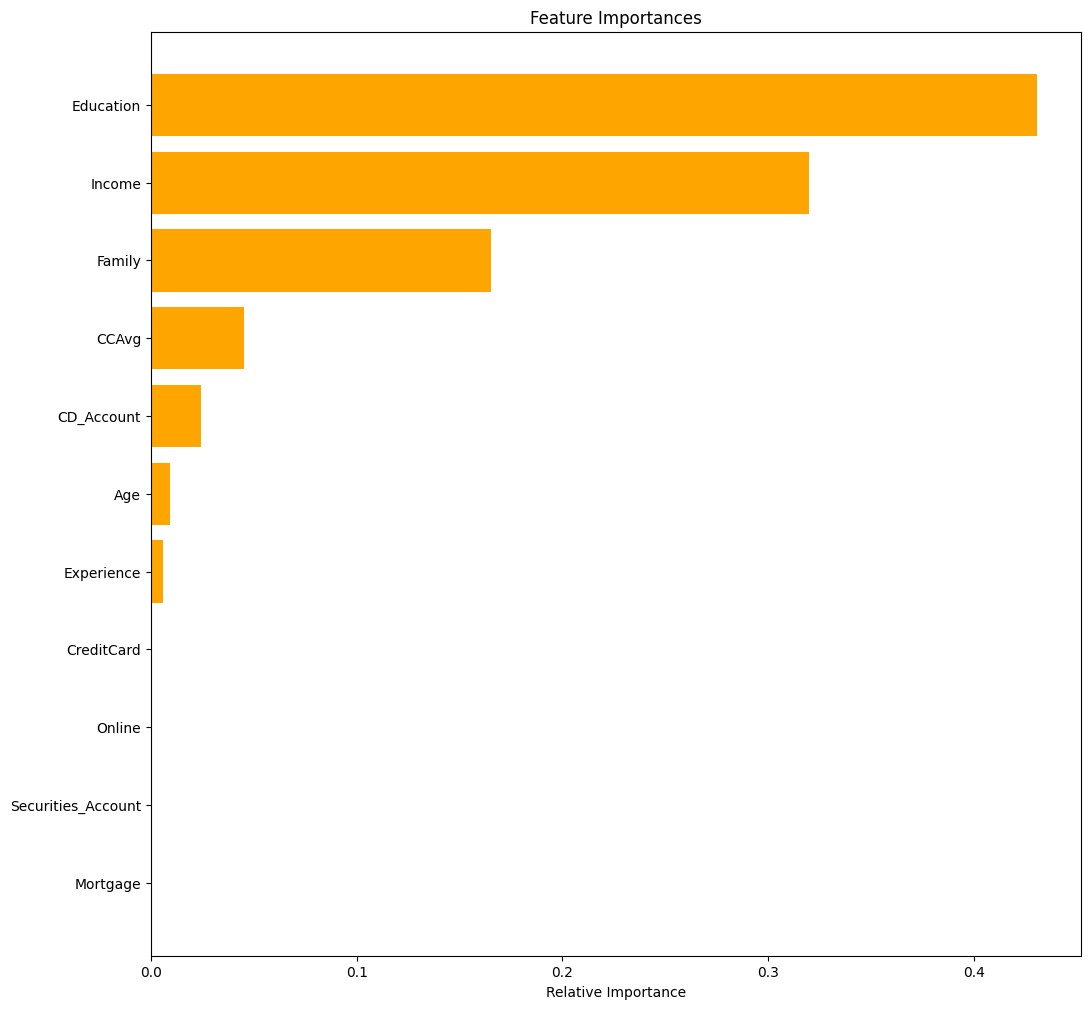

In [84]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="orange", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Comparisons

In [86]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree (sklearn default)  Decision Tree with class_weight  \
Accuracy                               1.0                              1.0   
Recall                                 1.0                              1.0   
Precision                              1.0                              1.0   
F1                                     1.0                              1.0   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                      0.988571                      0.992857  
Recall                        0.909366                      0.966767  
Precision                     0.967846                      0.958084  
F1                            0.937695                      0.962406

In [87]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree (sklearn default)  Decision Tree with class_weight  \
Accuracy                          0.980000                         0.974667   
Recall                            0.885906                         0.859060   
Precision                         0.910345                         0.882759   
F1                                0.897959                         0.870748   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                      0.978667                      0.984000  
Recall                        0.825503                      0.906040  
Precision                     0.953488                      0.931034  
F1                            0.884892                      0.918367

# Conclusion

<b> Decision Tree Summary </b>

* Models without prunning gives a high score which is expected due to overfitting of decision trees
* After Pruning, the observations generalizes well, indicating that tree has been optimized.
* On Test data, Post pruning gives higher score - Recall: .90 & F1: .91 as compared to pre-pruned tree - Recall: .82 & F1: .88
* Based on recall we can conclude the post-prunned model of the decision tree perfoms best as it gives the best recall scores.

<b>Summary for the Marketing Team</b>

* From decision tree models, we identified that Education, Income, Family, Mortgage, CCAvg, Age and CD Account are the most important variables in determining if a customer will accept a Personal Loan or not.
* Although the Pre-Pruning technique gives higher weightage to Income than Education, which makes sense as Customer with higher income tend to have more flexibility in terms of debt payments.
* Higher the Education, higher is the chance to opt for Personal Loan
* Customers with Income > 90kUSD have more chances to opt for Personal Loan.
* Customer with no CD (Certificate of Deposit) Account have higher chance to opt for Personal Loan
* Customer using Online facility have higher chance to opt for Personal Loan, since they can manage transactions without hassle.
* Customer not using other CreditCard have higher chance to opt for Personal Loan, since they have low debit, hence have higher chance to use Personal Loan.